In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy import stats


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_eda = pd.read_csv("dffinal.csv")
df_eda.head(2)

,make,model,version,fuel,year,kms,power,shift,price,location,publish_date,dealer_address,dealer_zip_code,lat,long,state,Car and Model,precio_categorias,kms_categoria,years_old
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,Pineda de Mar,2023-02-04,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,41.627681,2.689871,Catalunya,Opel Crossland,Alto,Muy Poco,3
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,Coslada,2023-01-20,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,40.423802,-3.555288,Comunidad de Madrid,Opel Crossland,Moderado,Moderado,3


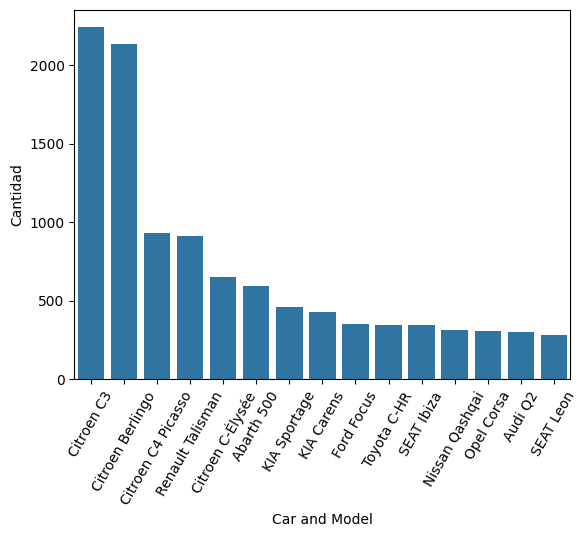

In [130]:
df_top15= df_eda.groupby(["Car and Model"]).count()["version"].reset_index().sort_values(by="version",ascending=False).head(15)
df_top15.rename(columns={"version":"Cantidad"},inplace=True)
df_top15
sns.barplot(x="Car and Model",y="Cantidad",data=df_top15)
plt.xticks(rotation=60);

Los modelos que lideran el ranking son C3 y Berlingo de Citroen. Citroen mantiene su liderazgo con sus modelos, de los top 5: 4 de ellos son Citroen.
Tambien podemos observar que se encuentran en este top 15 : **Toyota C-HR, Nissan Qasqhai, Audi Q2** que son coches SUV **compactos**. La gente quiere coches familiares? Hasta que punto estan dispuestos a pagar por esos coches?

# Hipótesis 1: El precio de un coche de segunda mano disminuye a menida que aumenta su edad y  kilometraje.

Vamos a hacer una observación con algunas marcas y modelos.
En concreto utilizaremos 5 marcas de coches: 2 marcas baratas (Citroen y Renault), 2 Marcas que son caras tirando a exclusivas (Audi,Mercedes) y 1 Marca eléctrica (Tesla)

In [92]:
df_citroen = df_eda.loc[df_eda["make"] == "Citroen"]
df_renault = df_eda.loc[df_eda["make"] == "Renault"]
df_audi = df_eda.loc[df_eda["make"] == "Audi"]
df_mercedes = df_eda.loc[df_eda["make"] == "Mercedes-Benz"]
df_Tesla = df_eda.loc[df_eda["make"] == "Tesla"]

In [93]:
def strip_plots_kms_precio(df,modelo):
    fig = plt.figure(figsize=(20,10))
    sns.catplot(x="kms_categoria",y="price",data=df.loc[df["model"] == modelo],hue="price",kind="strip")
    plt.xticks(rotation=60);
    plt.title(f"Relación km-precio de {modelo}")

## **<p align="center">Citroen C3</p>**

<Figure size 2000x1000 with 0 Axes>

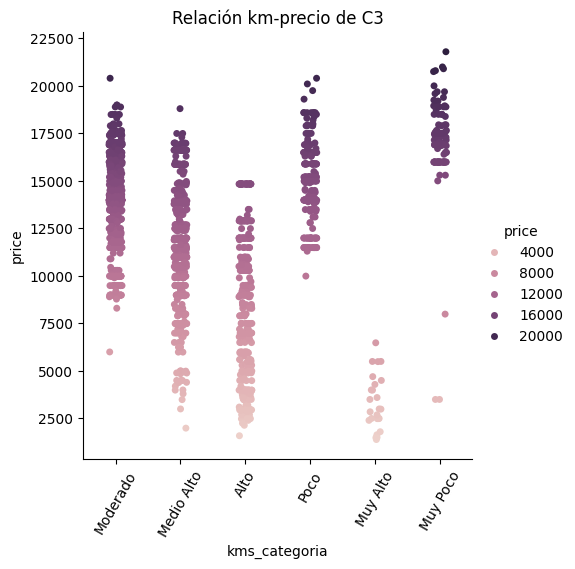

In [94]:
strip_plots_kms_precio(df_citroen,"C3")

En el modelo más vendido podemos observar que hay no hay casi diferencia de precio entre los coches que tienen Pocos kms y los que tienen un kilometraje Moderado. Tampoco con la categoría Muy poco, que son vehículos de ocasión.

Sin embargo, vemos que la diferencia entre los picos de las categorías **Muy alto** y **Alto** son muy grandes. Lo cuál nos haría pensar, ¿puede ser rentable comprar, entre esas 2 categorías, el vehículo con más kilómetros? Ya que me costaría la mitad de precio.

**En este modelo en particular,si los coches que vemos tienen un kilometraje entre Muy Poco y Moderado la opción más recomendable sería la de menor kilometraje**

**Pero si en cambio, nos encontramos con unos rangos entre Alto y Muy Alto podríamos reconsiderar comprar el coche con mayor kilometraje ya que la proporción de precio/km es muy alto**

## **<p align="center"> Renault Talisman <p>**

<Figure size 2000x1000 with 0 Axes>

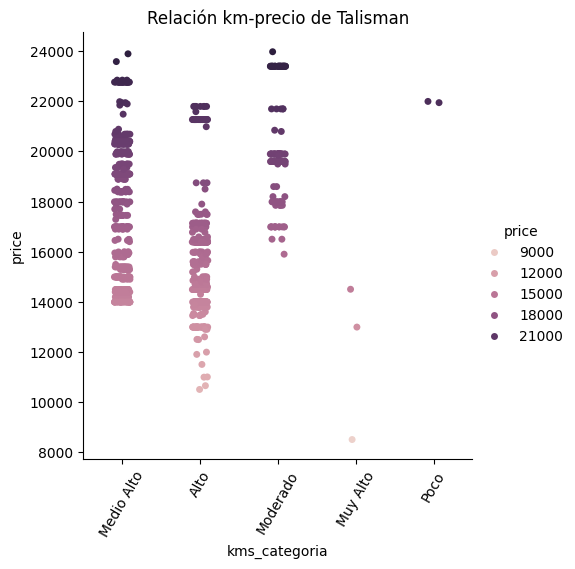

In [95]:
strip_plots_kms_precio(df_renault,"Talisman")

Renault Talisman:

-Muy pocos modelos con un kilometraje extremo: tanto Poco como Muy Alto.Inesxistencia de vehículos de ocasión.

-Entre las 3 categorías: Moderado,Medio Alto y Alto no hay una gran diferencia. Por lo que podríamos descartar la opción de comprar un coches con más kilómetros para ahorrar dinero

In [96]:
df_audi["model"].value_counts().sort_values(ascending=False).index[0]

'Q2'

## **<p align="center">Audi Q2<p>**

<Figure size 2000x1000 with 0 Axes>

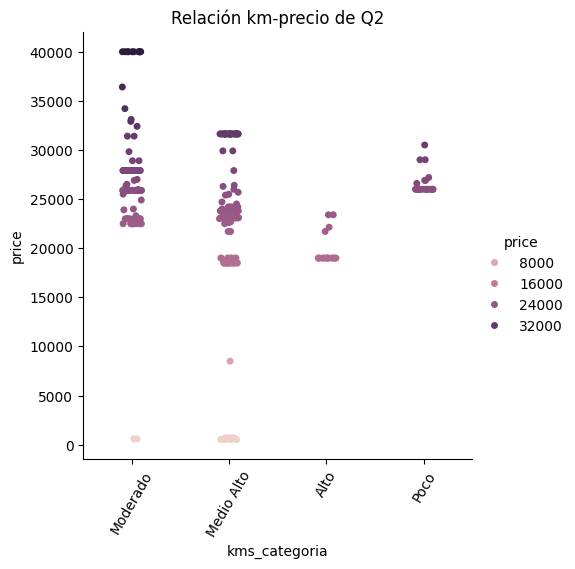

In [97]:
strip_plots_kms_precio(df_audi,"Q2")

En el modelo Q2 de Audi podemos ver que hay una bajada normal con la relacion kms-precio. Aquí sería decisión del cliente , teniendo en cuenta otros aspectos del coche, como el año , la versión y otras características a tener en cuenta.

In [98]:
df_mercedes["model"].value_counts().sort_values(ascending=False).index[0]

'Clase CLA'

## **<p align="center">Mercedes CLA<p>**

<Figure size 2000x1000 with 0 Axes>

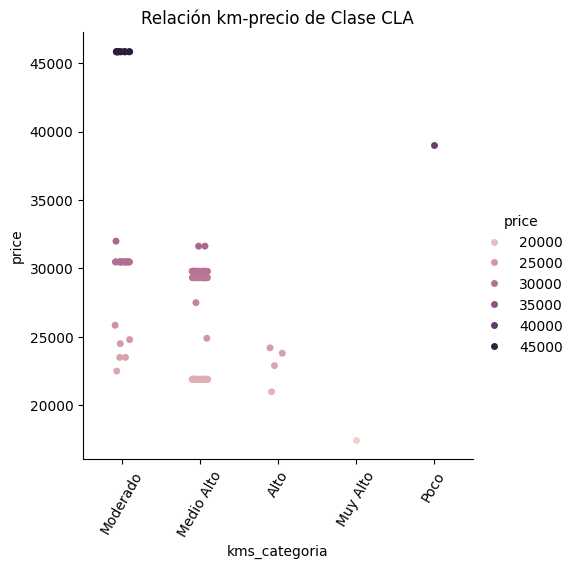

In [99]:
strip_plots_kms_precio(df_mercedes,"Clase CLA")

## **<p align="center">Tesla</p>**

In [100]:
df_Tesla["model"].value_counts()

model
Model 3    82
Model X    46
Model Y    31
Model S    16
Name: count, dtype: int64

Como de Tesla hay tan pocos modelos podemos hacer un análisis general y uno por modelos

<Figure size 2000x1000 with 0 Axes>

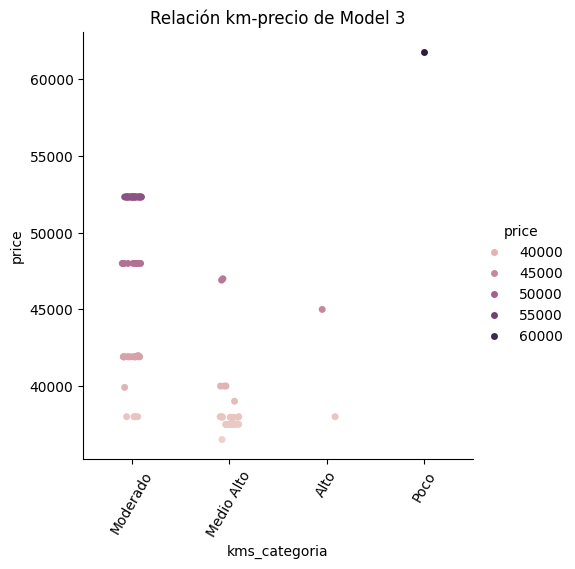

<Figure size 2000x1000 with 0 Axes>

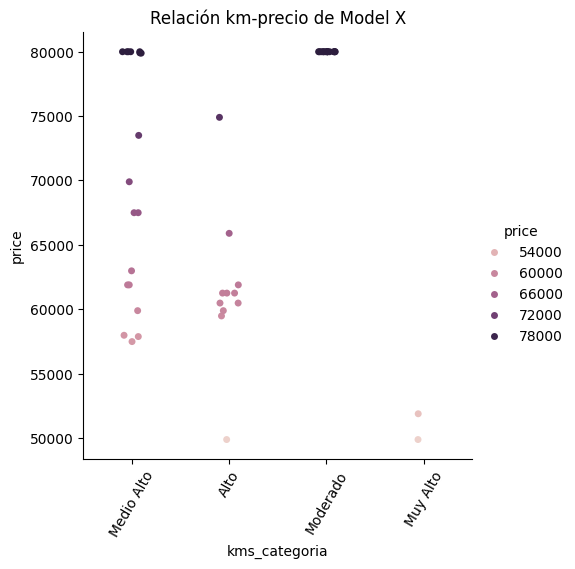

<Figure size 2000x1000 with 0 Axes>

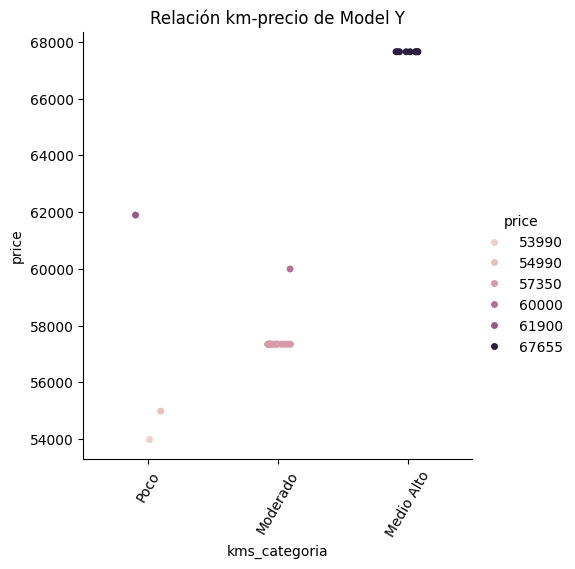

<Figure size 2000x1000 with 0 Axes>

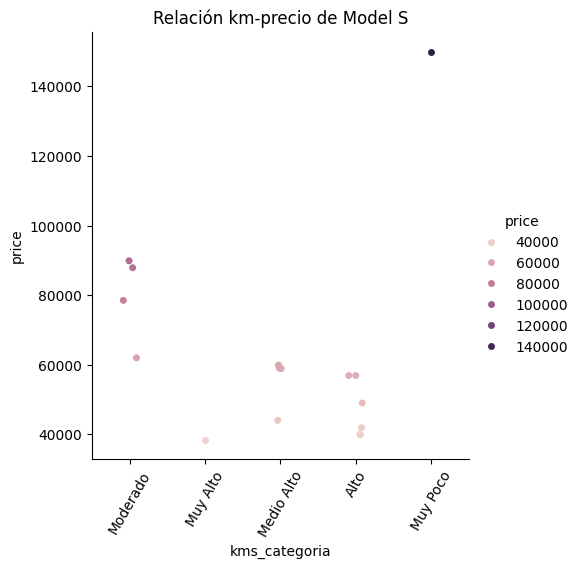

In [101]:
for model in df_Tesla["model"].unique():
    strip_plots_kms_precio(df_Tesla,model)

MODEL 3: Mejor opción la categoría moderada

MODEL X: Categoría Medio-Alto

MODEL Y: Categoría Poco

MODEL S: Categoría Moderado y Medio-Alto

C:\Users\David\AppData\Local\Temp\ipykernel_28224\1599159067.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


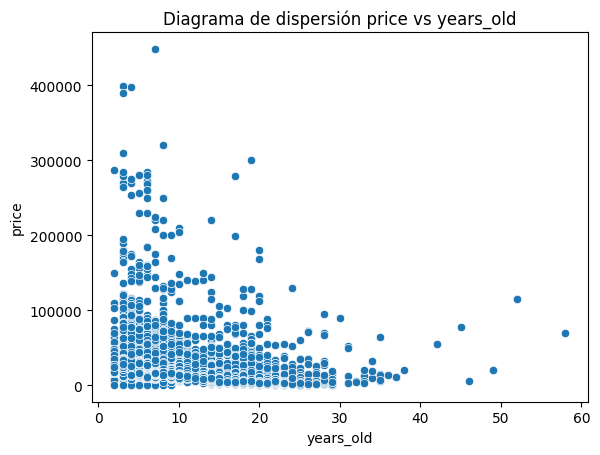

In [114]:
#Análisis bivariante de: price vs years_old y price vs kms
fig = plt.figure()
sns.scatterplot(x="years_old",y="price",data=df_eda)
plt.title("Diagrama de dispersión price vs years_old")
fig.show()

Observamos que hay una bajada casi perfecta, cuantos más años tenga un coche menor será su precio.

C:\Users\David\AppData\Local\Temp\ipykernel_28224\3872764148.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


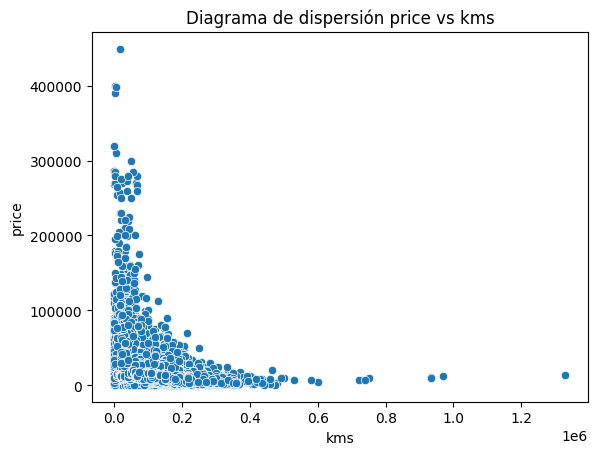

In [115]:
fig = plt.figure()
sns.scatterplot(x="kms",y="price",data=df_eda)
plt.title("Diagrama de dispersión price vs kms")
fig.show()

Vamos a hacer lo mismo, pero dejando los valores outliers a un lado. Me interesaría ver aquí, la distribución sin ver esos datos anómalos

In [127]:
q1= df_eda["price"].quantile(0.25)
q3= df_eda["price"].quantile(0.75)

IQR = q3 -q1

df_sin_outliers = df_eda.loc[~((df_eda["price"] < (q1 - 1.5 * IQR)) | df_eda["price"] > (q3 + 1.5*IQR))]

C:\Users\David\AppData\Local\Temp\ipykernel_28224\3008188.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


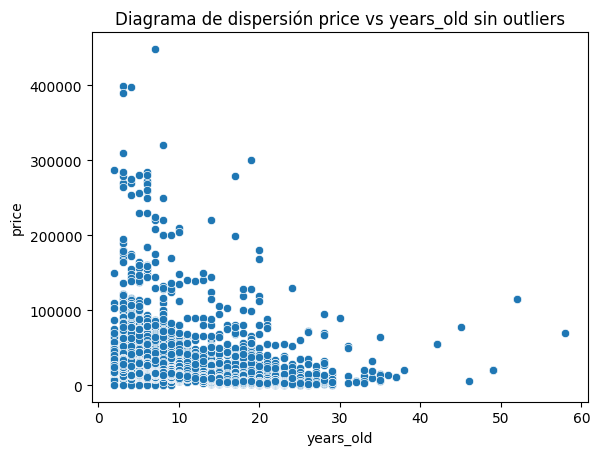

In [128]:
fig = plt.figure()
sns.scatterplot(x="years_old",y="price",data=df_sin_outliers)
plt.title("Diagrama de dispersión price vs years_old sin outliers")
fig.show()

C:\Users\David\AppData\Local\Temp\ipykernel_28224\499097081.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


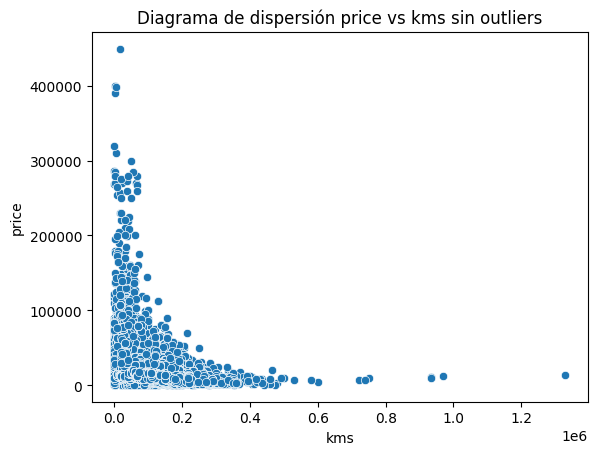

In [129]:
fig = plt.figure()
sns.scatterplot(x="kms",y="price",data=df_sin_outliers)
plt.title("Diagrama de dispersión price vs kms sin outliers")
fig.show()

No veo casi diferencia por lo que podríamos dejarlo a un lado por ahora

Nuestra hipótesis inicial se ve respaldada por esta relación exponencial decreciente, a medida que los kilómetros de un coche aumentan su precio baja drásticamente

<Axes: >

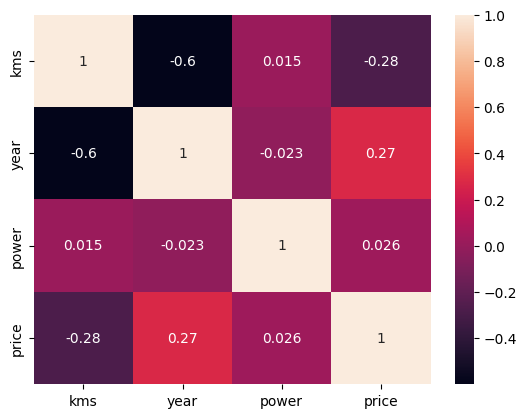

In [116]:
correlacion = df_numericas.corr(method="pearson")
sns.heatmap(correlacion,annot=True)

Observamos que ,como era de esperar, el **año** de un coche y los **kms** que tienen una **correlación lineal negativa fuerte**. Es decir los kms aumentan, generalmente, con el paso de los años.

A parte podemos ver que también tiene una **correlación lineal negativa** con el **precio** que tiene el coche, no es tan fuerte como con el año del coche pero tampoco es insignificante. Podemos tener 2 coches iguales pero con diferente kilometraje y el que más kilómetros tenga,lógicamente,será más barato. Es lógico ya que el kilometraje representa el nivel de vida de dicho coche. **Pero si la diferencia de precio es muy grande, ¿Es más rentable comprar un coche que tenga más kilómetros,hasta un cierto punto,si el precio es mucho menor?**

 ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vamos a hacer un contraste de hipótesis para verificar, por ultima vez, que las variables **price** vs **kms** y **price** vs **year** son dependientes

In [102]:
pearsonr(df_eda["kms"],df_eda["price"])

PearsonRResult(statistic=np.float64(-0.2783743315018911), pvalue=np.float64(0.0))

In [149]:
statistic_pearson,p_valor_year_price = pearsonr(df_eda["price"],df_eda["year"])
p_valor_year_price

np.float64(0.0)

<div style="color:green">Rechazamos la Hipótesis nula de que no hay una correlación lineal y aceptamos que hay evidencia estadísticamente significativa de que sí existe correlación lineal</div>

# Hipótesis 2: Los coches de marcas premium (como BMW o Audi) tienen precios más altos que marcas generalistas (como Opel o Citroën).

<div style="color:red">¿Por qué? Porque las marcas premium suelen tener mejor reputación y materiales de mayor calidad</div>

Vamos a analizar ahora los precios medios por marca

In [11]:
df_precio_medio_x_marca = df_eda.groupby("make").agg({"price":"mean"}).reset_index().sort_values(by="price")
df_precio_medio_x_marca

,make,price
31,Lada,999.000000
51,Rover,2190.909091
14,Daewoo,2413.714286
59,Tata,3834.900000
20,Galloper,4425.000000
62,VAZ,4990.000000
15,Daihatsu,5233.000000
10,Chrysler,5887.428571
54,Santana,5990.000000
53,Saab,9237.733333


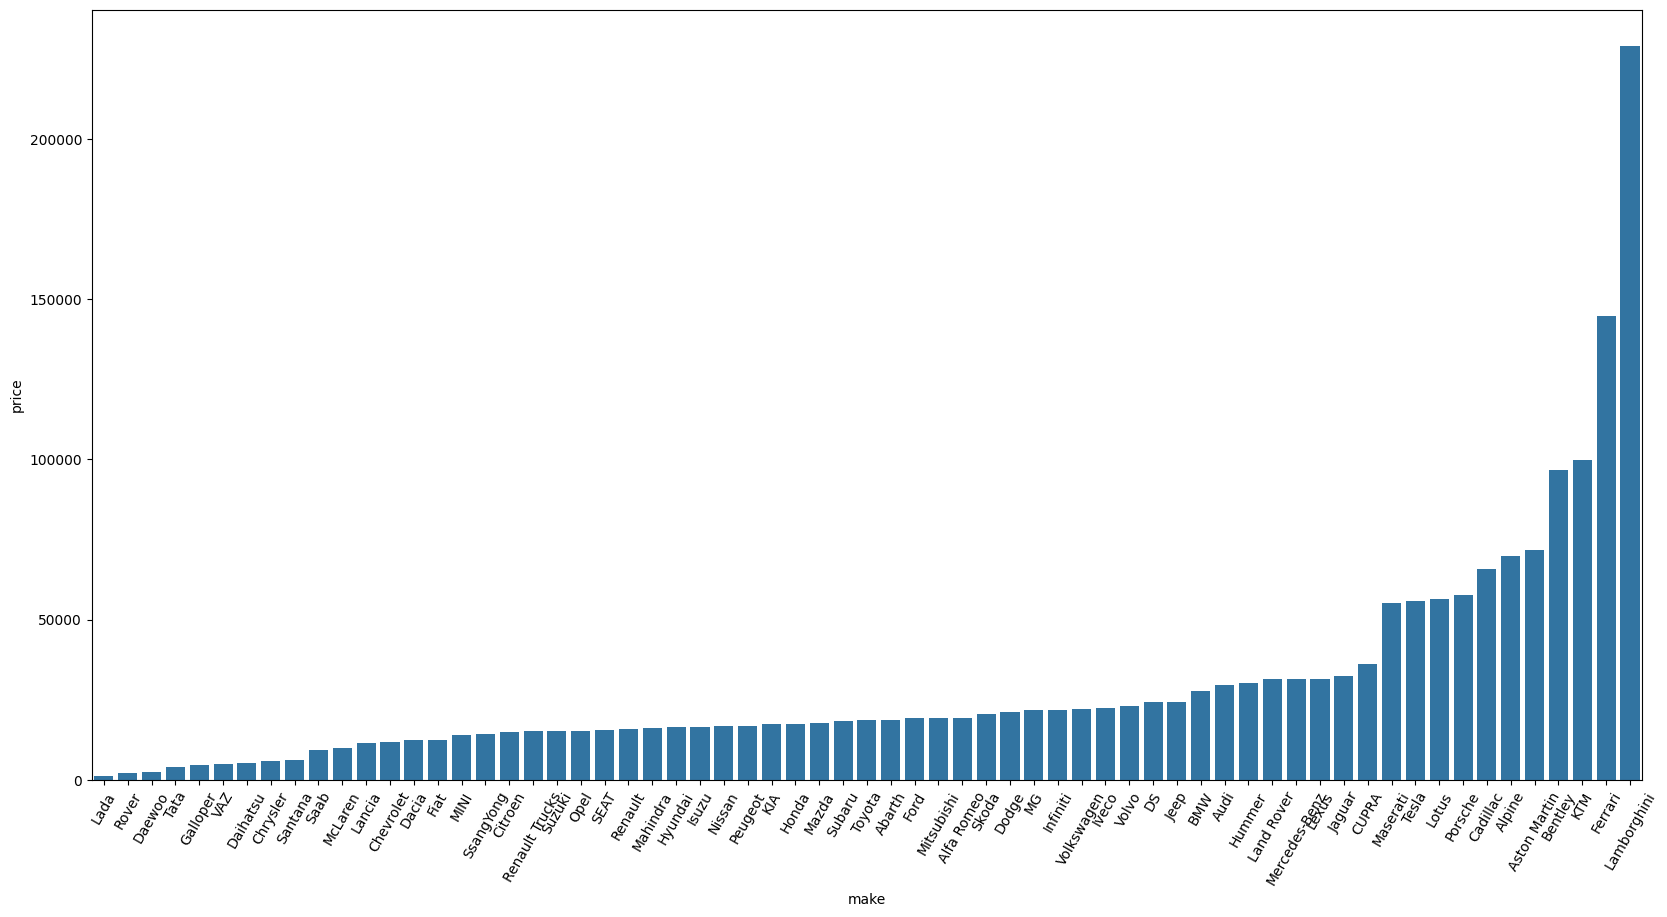

In [14]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x="make",y="price",data=df_precio_medio_x_marca)
plt.xticks(rotation=60);

No hay mucho que comentar aquí, una mirada vale más que mil palabras...

In [104]:
def boxplot_categorica_numerica(df,var_cat,var_num,limites=False):
    fig = plt.figure(figsize=(20,20))
    sns.boxplot(x=var_cat,y=var_num,hue=var_cat,data=df)
    plt.title(f"Relacion entre {var_cat} y {var_num}")
    plt.xticks(rotation=60)
    if limites:
        plt.yticks(np.arange(0,500000,20000));

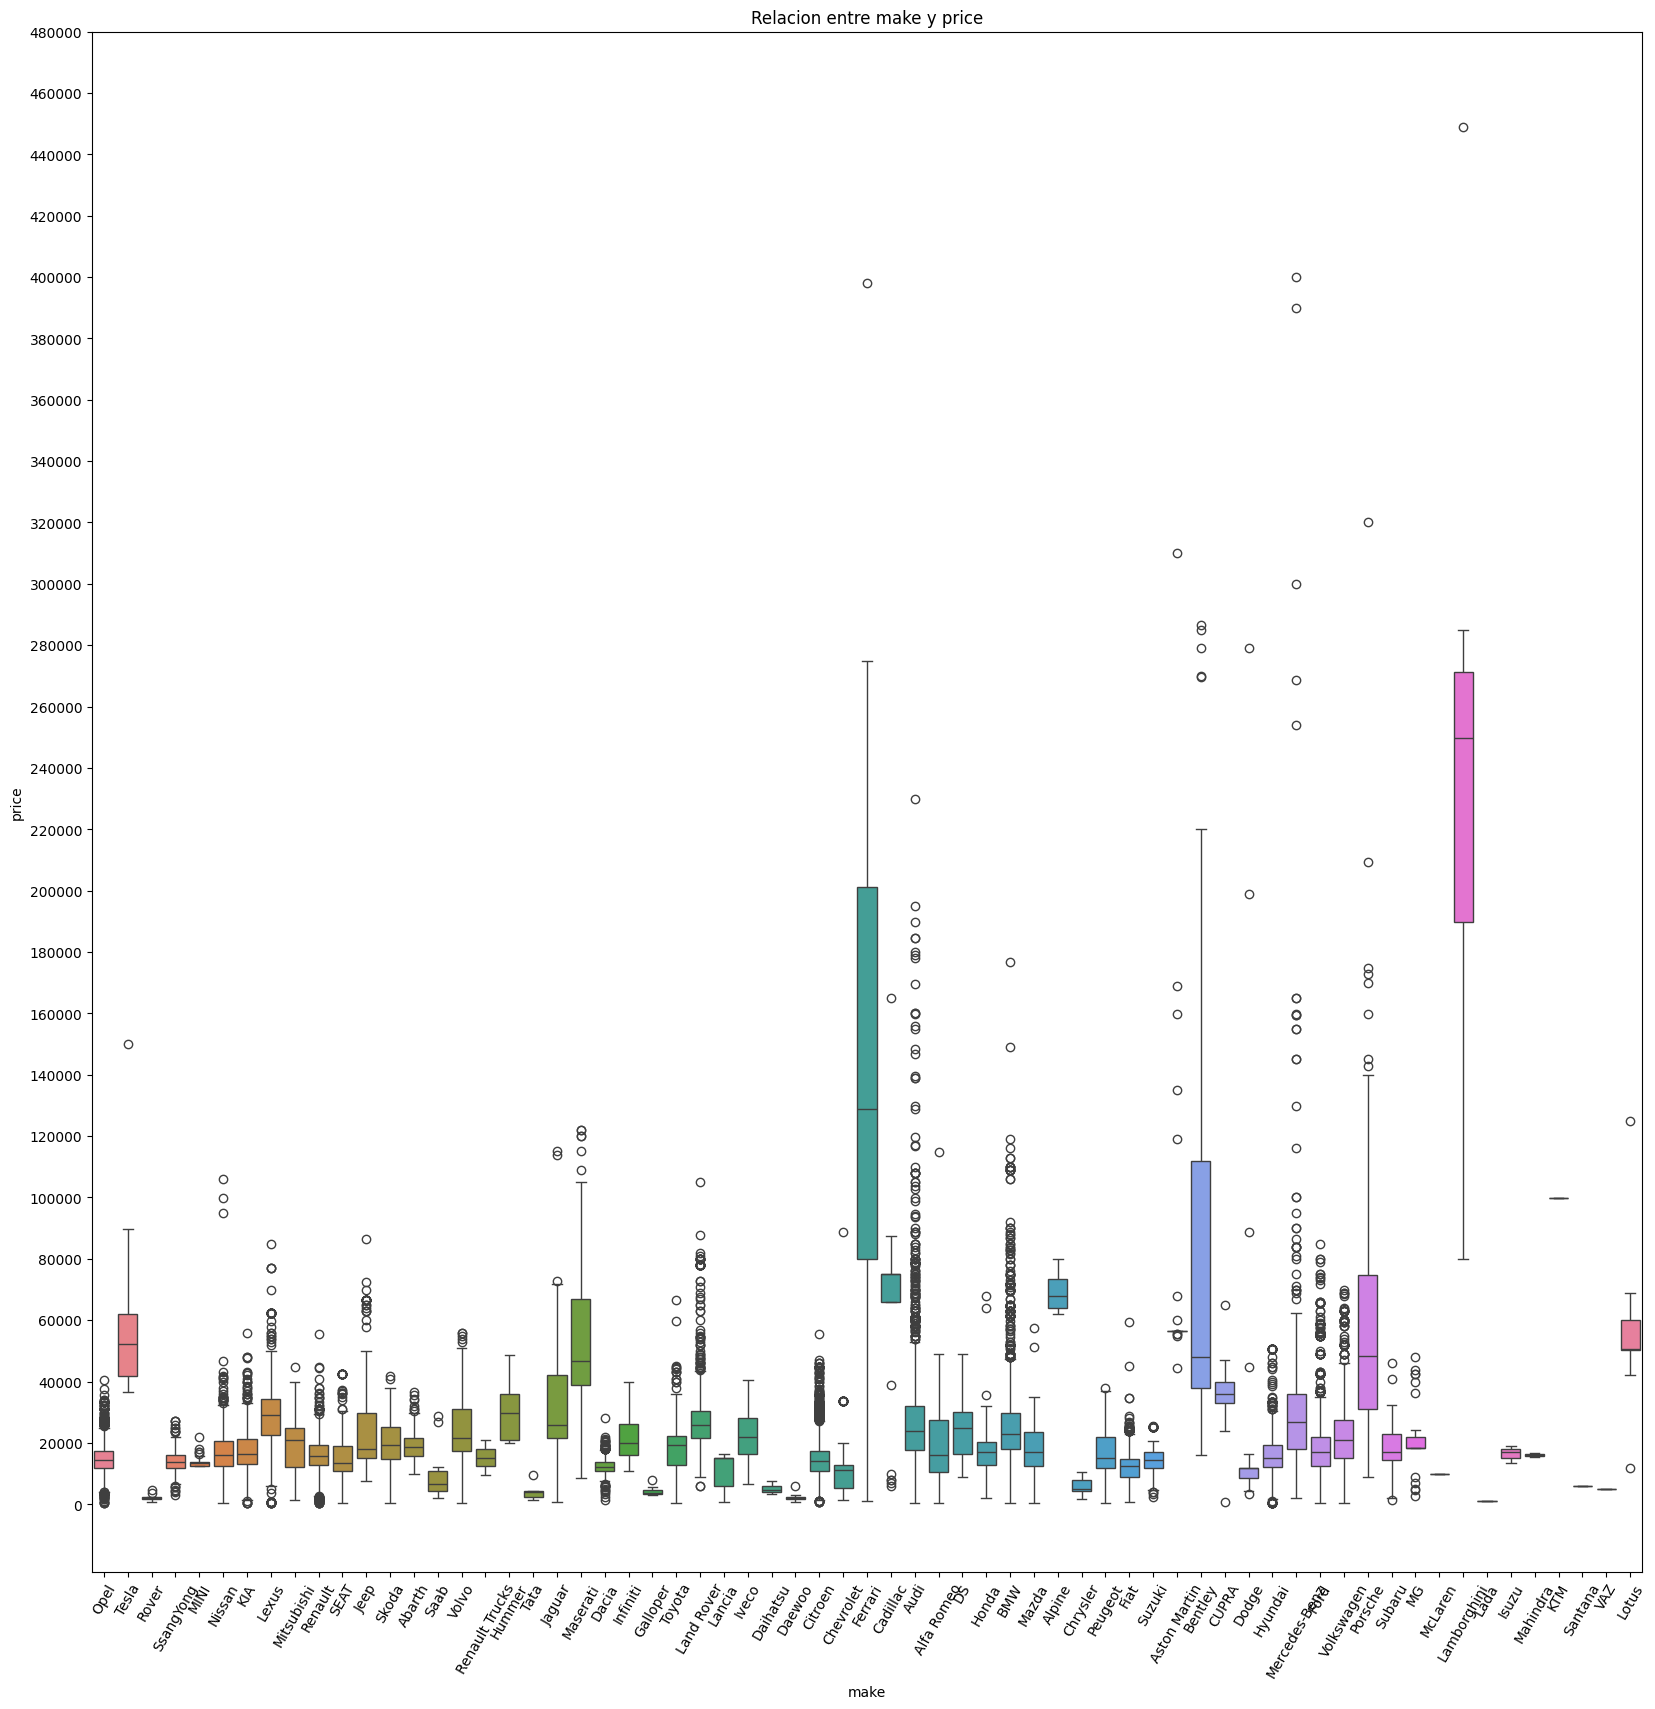

In [105]:
boxplot_categorica_numerica(df_eda,"make","price",limites=True)

Este boxplot a simple vista confirma nuestra hipótesis de que marcas como Tesla,Mercedes y Land Rover tienen precios medios y máximos más altos que generalistas como Seat,Citroen o Renault.

Aunque ya hayamos sacado conclusiones de la hipótesis 1 (Precio vs kilometraje), la presencia de tantos outliers en marcas premium nos podrían sugerir que algunos coches con bajo kilometraje podrían ser los responsables de estos valores extremos

In [118]:
df_mercedes.loc[df_mercedes["price"] >150000]

,make,model,version,fuel,year,kms,power,shift,price,location,publish_date,dealer_address,dealer_zip_code,lat,long,state,Car and Model,precio_categorias,kms_categoria,years_old
2412,Mercedes-Benz,Clase G,G 350 d 286 5p 9G-T,Diésel,2020,11000.0,286.0,automatic,165000,Sant Adrià de Besòs,2022-12-06,"26, Carrer de Sant Joan, Santa Coloma de Grame...",8930.0,41.430483,2.218278,Catalunya,Mercedes-Benz Clase G,Excesivo,Poco,5
2413,Mercedes-Benz,Clase G,G 63 AMG 585 5p 9G-T,Gasolina,2022,1300.0,800.0,automatic,399900,Barcelona,2022-11-07,"Passeig de Gràcia, la Dreta de l'Eixample, Eix...",8007.0,41.382894,2.177432,Catalunya,Mercedes-Benz Clase G,Excesivo,Muy Poco,3
2414,Mercedes-Benz,Clase G,G 63 AMG 585 5p 9G-T,Gasolina,2022,1.0,585.0,automatic,268800,Madrid,2022-11-24,"Calle de Julián Hernández, San Juan Bautista, ...",28043.0,40.416705,-3.703582,Comunidad de Madrid,Mercedes-Benz Clase G,Excesivo,Muy Poco,3
3635,Mercedes-Benz,Clase G,G 350 d AMG Line 4Matic IVA Deducible 286cv,Diésel,2019,59519.0,286.0,automatic,154990,Madrid,2022-12-22,"Arguelles Automoviles, 5, Calle de Galileo, Ar...",28015.0,40.416705,-3.703582,Comunidad de Madrid,Mercedes-Benz Clase G,Excesivo,Medio Alto,6
3652,Mercedes-Benz,AMG GT,Coupé AMG GT C 557 Edition 50 3p DCT,Gasolina,2018,11500.0,557.0,automatic,164900,Sueca,2022-12-27,"CV-505, Riola, la Ribera Baixa, València / Val...",46410.0,39.202560,-0.311165,Comunitat Valenciana,Mercedes-Benz AMG GT,Excesivo,Poco,7
9651,Mercedes-Benz,Clase G,G 63 AMG 585 5p 9G-T,Gasolina,2022,1100.0,700.0,automatic,389900,Barcelona,2022-11-07,"Passeig de Gràcia, la Dreta de l'Eixample, Eix...",8007.0,41.382894,2.177432,Catalunya,Mercedes-Benz Clase G,Excesivo,Muy Poco,3
12236,Mercedes-Benz,AMG GT,Coupé AMG GT R 585 3p DCT,Gasolina,2019,21000.0,585.0,automatic,159900,Málaga,2023-02-01,"15, Calle La Boheme, Cruz de Humilladero, Mála...",29006.0,36.721303,-4.421637,Andalucía,Mercedes-Benz AMG GT,Excesivo,Moderado,6
12642,Mercedes-Benz,Clase G,G 63 AMG 585 5p 9G-T,Gasolina,2021,8000.0,585.0,automatic,253990,Barcelona,2022-10-22,"31-33, Carrer de Provença, la Nova Esquerra de...",8029.0,41.382894,2.177432,Catalunya,Mercedes-Benz Clase G,Excesivo,Poco,4
12671,Mercedes-Benz,SLR,McLaren Coupé 5.4 626 2p,Gasolina,2006,49000.0,626.0,automatic,299999,San Sebastián de Los Reyes,2023-01-19,"Ahorramás, 2, Avenida del Juncal, San Sebastiá...",28703.0,40.547370,-3.626059,Comunidad de Madrid,Mercedes-Benz SLR,Excesivo,Moderado,19
18212,Mercedes-Benz,Clase G,G 350 d AMG Line 4Matic IVA Deducible 286cv,Diésel,2019,59519.0,286.0,automatic,154990,Barcelona,2022-12-22,"119, Via Augusta, Sarrià, Sarrià - Sant Gervas...",8006.0,41.382894,2.177432,Catalunya,Mercedes-Benz Clase G,Excesivo,Medio Alto,6


Observamos por ejemplo en la marca Mercedes que por ejemplo el modelo Clase G, aunque tenga 60.000 kms sigue valiendo una fortuna. 
Por otra parte vemos que la mayoría de sus coches, tienen poco kilometraje son relativamente nuevos en cuanto al año y son modelos premium.De ahí sus precios desorbitados

In [106]:

def histogramas_categoric_numeric(df,var_Cat,var_num):
    n = len(df[var_Cat].unique())
    cols = 5
    filas = int(n/cols) + int(n%cols)
    fig,axs = plt.subplots(filas,cols,figsize = (20,40))
    axs = axs.flatten()
    for i,valor in enumerate(df[var_Cat].unique()):
        sns.histplot(df.loc[df[var_Cat]==valor,var_num],kde=True,ax=axs[i],label=var_Cat)
        axs[i].set_title(f"Relacion entre {valor} y price")
        axs[i].set_ylabel("")
        axs[i].set_xlabel("")
    for j in range(i+1,len(axs)):
        axs[j].set_visible(False)
    fig.subplots_adjust(wspace=0.6,hspace=0.5)
    plt.tight_layout;

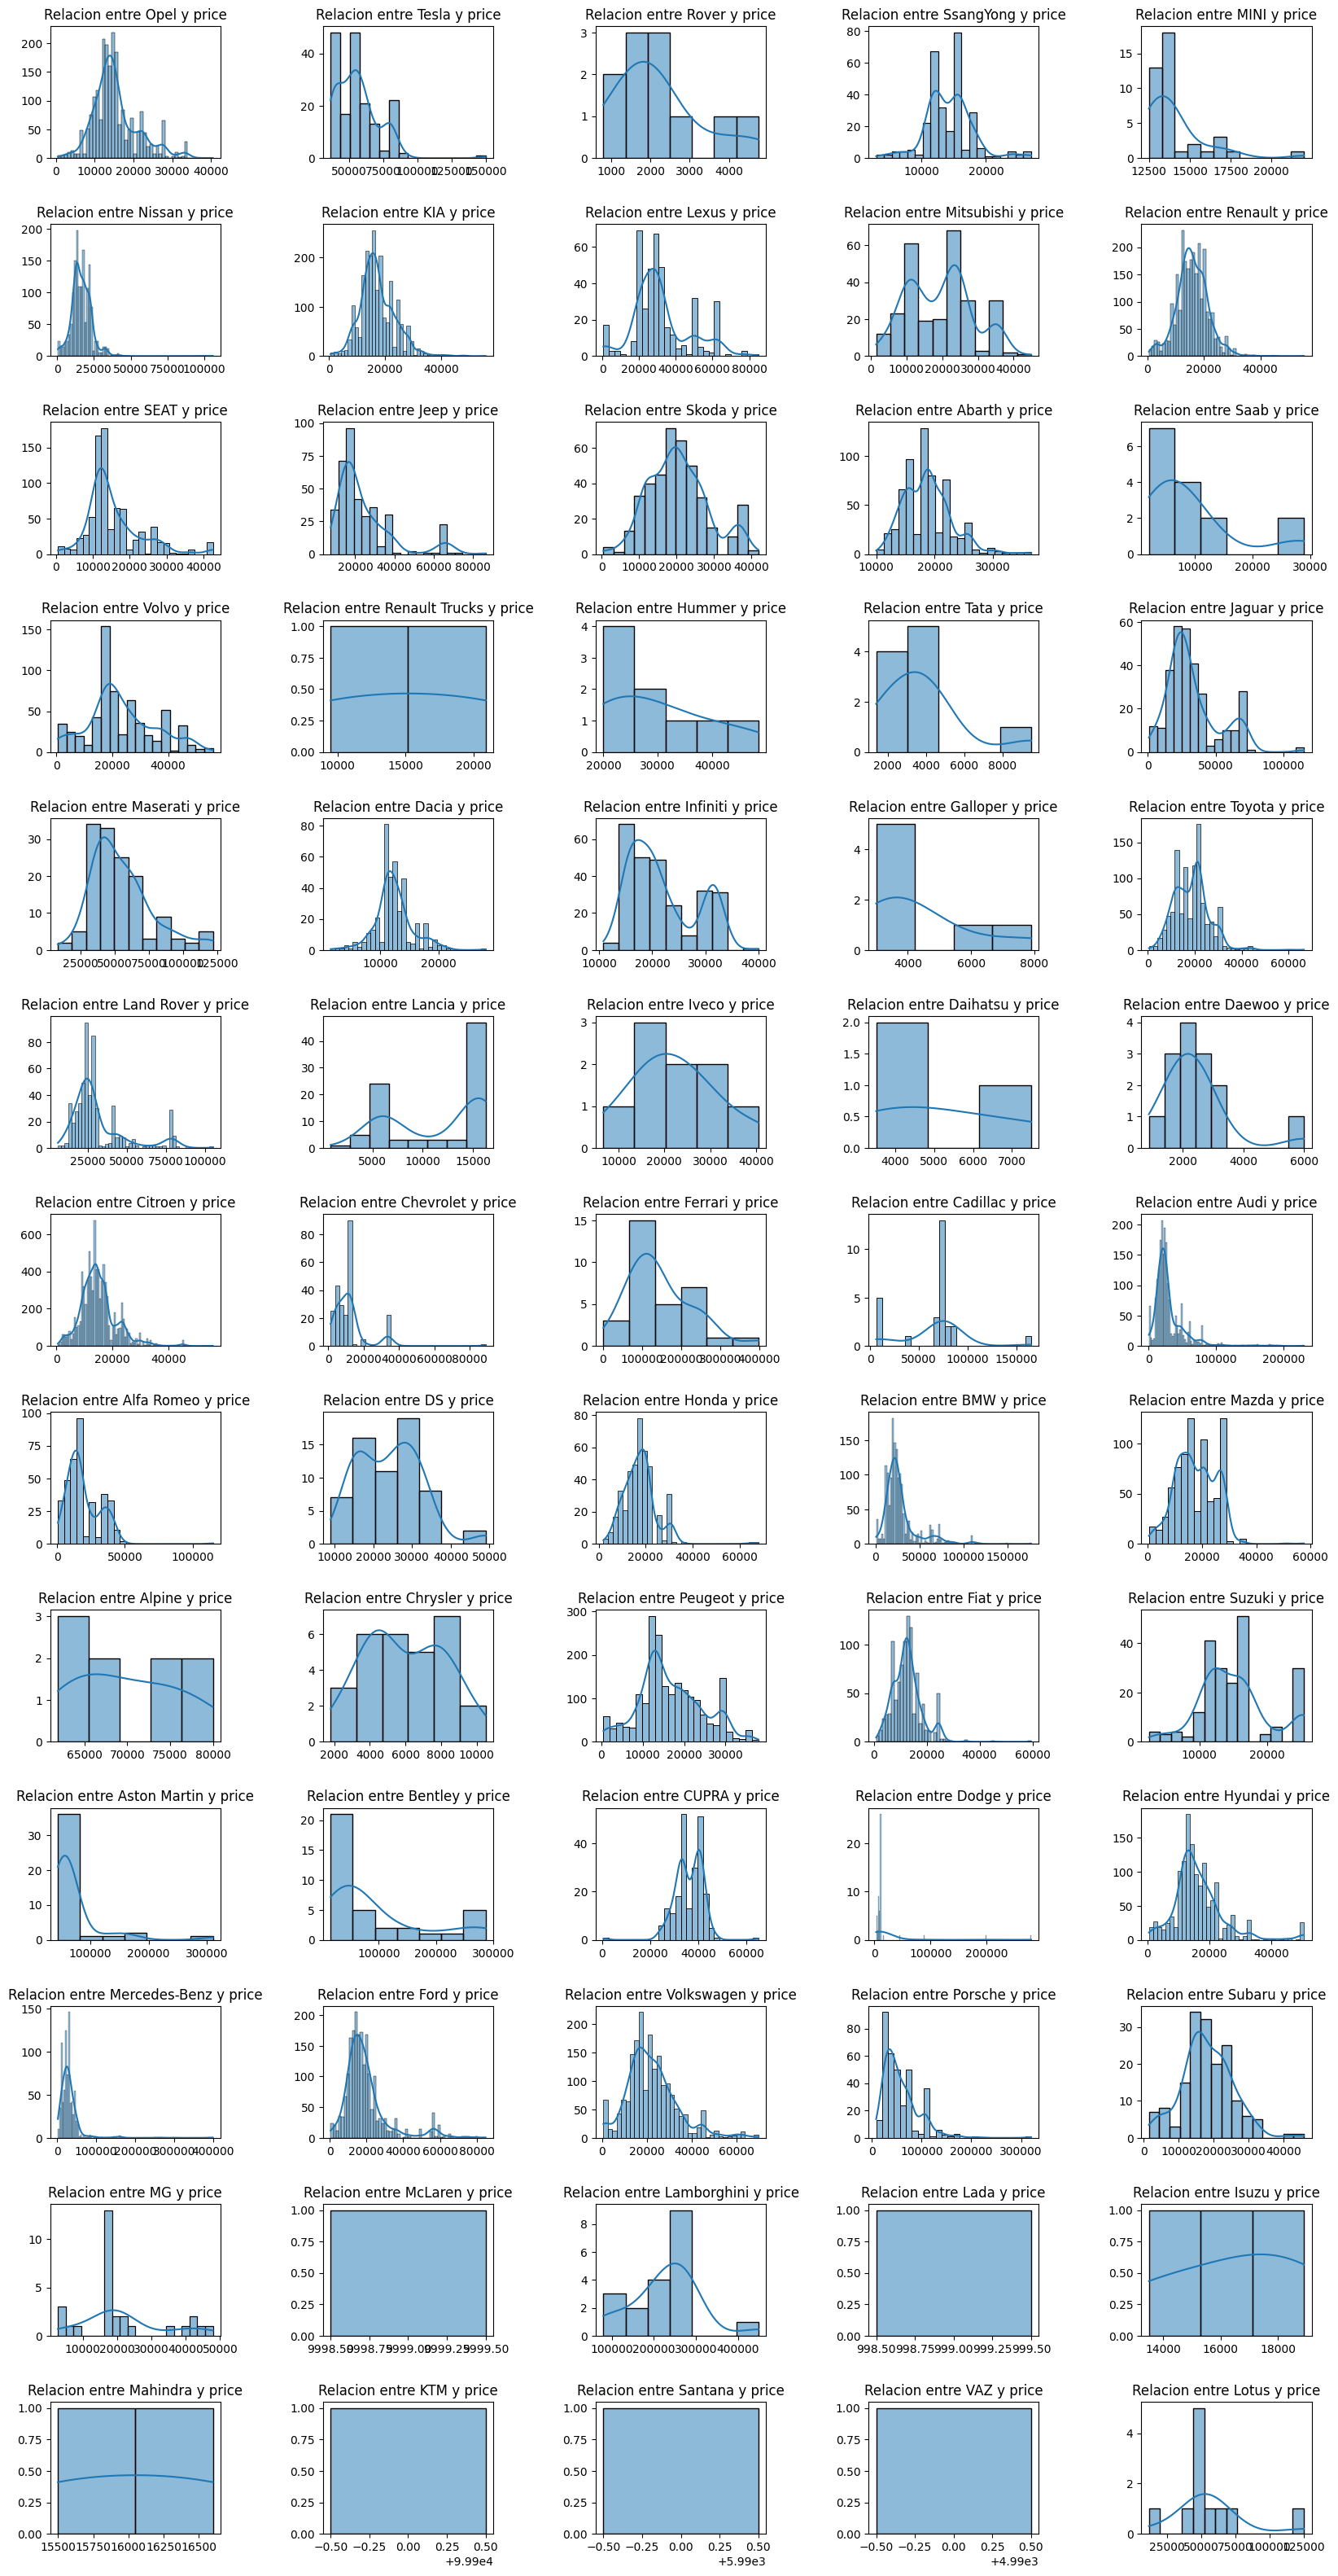

In [107]:

histogramas_categoric_numeric(df_eda,"make","price")

Reafianzamos nuestra hipótesis viendo los rangos de precio de cada marca. Vemos por ejemplo que Lamborghini tiene un rango de 100.000 a 400.000€, Audi tiene de 0 a 250.000 € e Iveco tiene un rango de 10.000 a 40.000€.

Lo cual no significa que por ejemplo IVECO sea mala marca, IVECO destaca por muchos de sus ámbitos llegando a ser líder en ámbitos incluso de camiones pesados. Lo que pasa es que son marcas genéricas que su nombre no llega a pesar tanto como una marca como Mercedes-Benz.

 ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vamos a hacer un contraste de hipótesis para verificar, por ultima vez, que las variables **price** vs **make** son dependientes

In [150]:
grupos = df_eda["make"].unique()
precio_x_marca = [df_eda.loc[df_eda["make"] == grupo,"price"] for grupo in grupos]
valor_f,valor_p_price_make =stats.f_oneway(*precio_x_marca)
valor_p_price_make

np.float64(0.0)

<div style="color:green">Rechazamos la Hipótesis nula de que no hay una correlación lineal y aceptamos que hay evidencia estadísticamente significativa de que sí existe correlación entre estas 2 variables</div>

# Hipótesis 3: Los coches con transimisión automática son más caros que los manuales

<div style="color:red">¿Por qué? Porque los coches automáticas suelen ser más modernos y cómodos, lo que podría aumentar su precio</div>

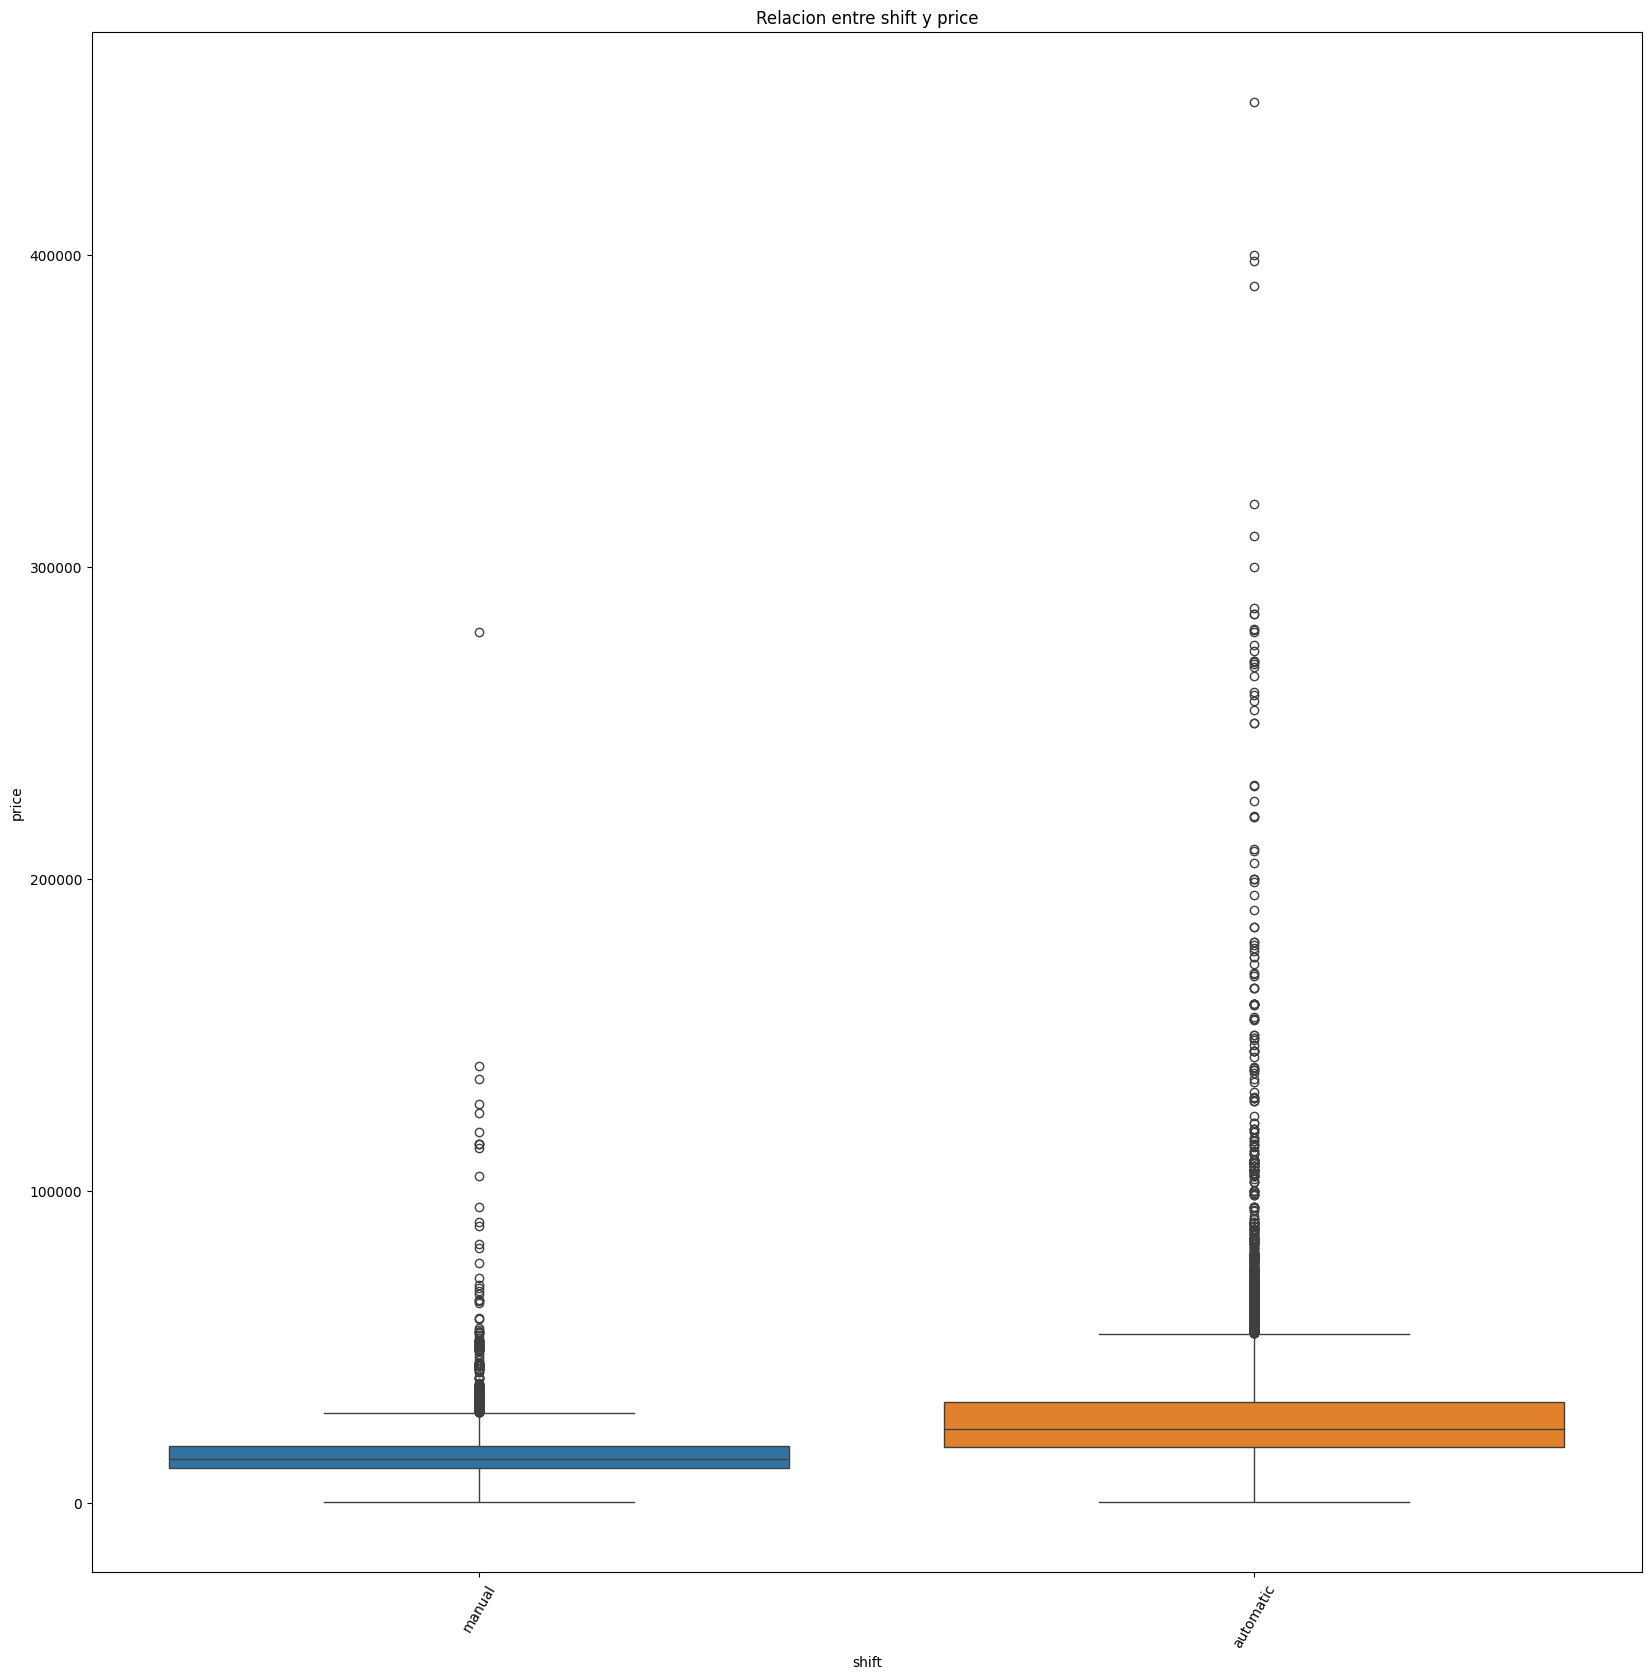

In [156]:
boxplot_categorica_numerica(df_eda,"shift","price")

El boxplot sugiere que los coches automáticos tienden a tener precios más altos en términos de mediana y rango superior, lo que respalda nuestra hipótesis. Los outliers altos en los automáticos podrían indicar modelos de lujo o en buen estado, mientras que los manuales parecen más uniformes y orientados a precios bajos.

Es más si nos fijamos bien , vemos que los coches que sobrepasan los 150.000 son todos automáticos.

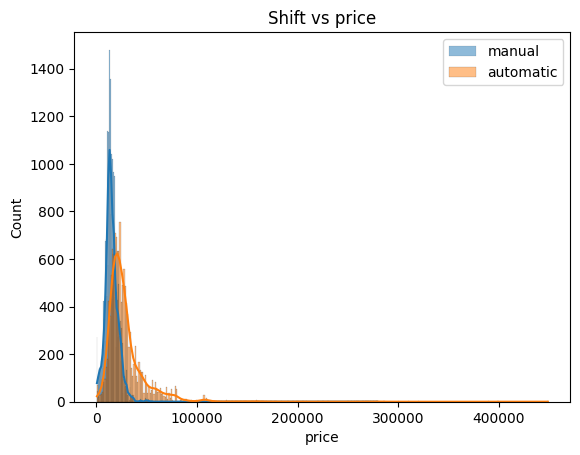

In [143]:
for i in ["manual","automatic"]:
    sns.histplot(df_eda.loc[df_eda["shift"] == i,"price"],kde=True,label=i)
    plt.title("Shift vs price")
    plt.legend()

Con este gráfico lo vemos perfectamente, vemos con la funcion de densidad de probabilidad que los coches automáticos podrían tener precios más altos en promedio o al menos una mayor proporción de ellos en rangos de precio superiores

 ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vamos a hacer un contraste de hipótesis para verificar, por ultima vez, que las variables **price** vs **shift** son dependientes

In [147]:
var_manual = df_eda.loc[df_eda["shift"] == "manual","price"]
var_automatico = df_eda.loc[df_eda["shift"] == "automatic","price"]

estadistica_u ,p_valor = mannwhitneyu(var_manual,var_automatico)
print(estadistica_u,p_valor)

64672253.5 0.0


<div style="color:green">Rechazamos la Hipótesis nula de que no hay una correlación lineal y aceptamos que hay evidencia estadísticamente significativa de que sí existe correlación lineal</div>

# Hipótesis 4: Los coches diésel son los más económicos

<div style="color:red">¿Por qué? Todos hemos sabido siempre que los coches diésel son los más económicos y duraderos. ¿Pero es un mito o una realidad? Vamos a verlo</div>

In [131]:
df_eda.fuel.value_counts()

fuel
Diésel       21796
Gasolina     14784
Eléctrico     2245
Otros          275
Name: count, dtype: int64

In [17]:

df_eda.groupby("fuel").agg({"price":"mean"})

,price
fuel,
Diésel,17583.368010
Eléctrico,34043.226206
Gasolina,19516.300448
Otros,16880.434629


<Axes: >

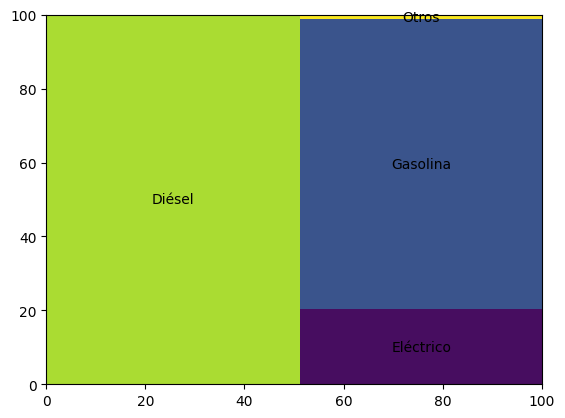

In [152]:
import squarify
datos = df_eda.groupby("fuel",as_index=False).agg({"price":"sum"})
squarify.plot(sizes=datos["price"],label= datos["fuel"])

Vemos que hay una cantidad inmensa de coches **diesel** y **Gasolina** y que sus precios medios son mucho más bajo que los eléctricos. También vimos al principio del notebook que las marcas más vendidas eran Citroen y Renault, lo cuál son marcas genéricas.

Los coches diésel se asemejan con coches económicos y genéricos, no siempre pero si mayoritariamente. Por eso vemos que aunque los precios de los coches diésel son menores , se venden mcuhas cantidades por eso vemos en el gráfico de arriba que sus ingresos equivalen a los ingresos de las otras 3 categorías juntas

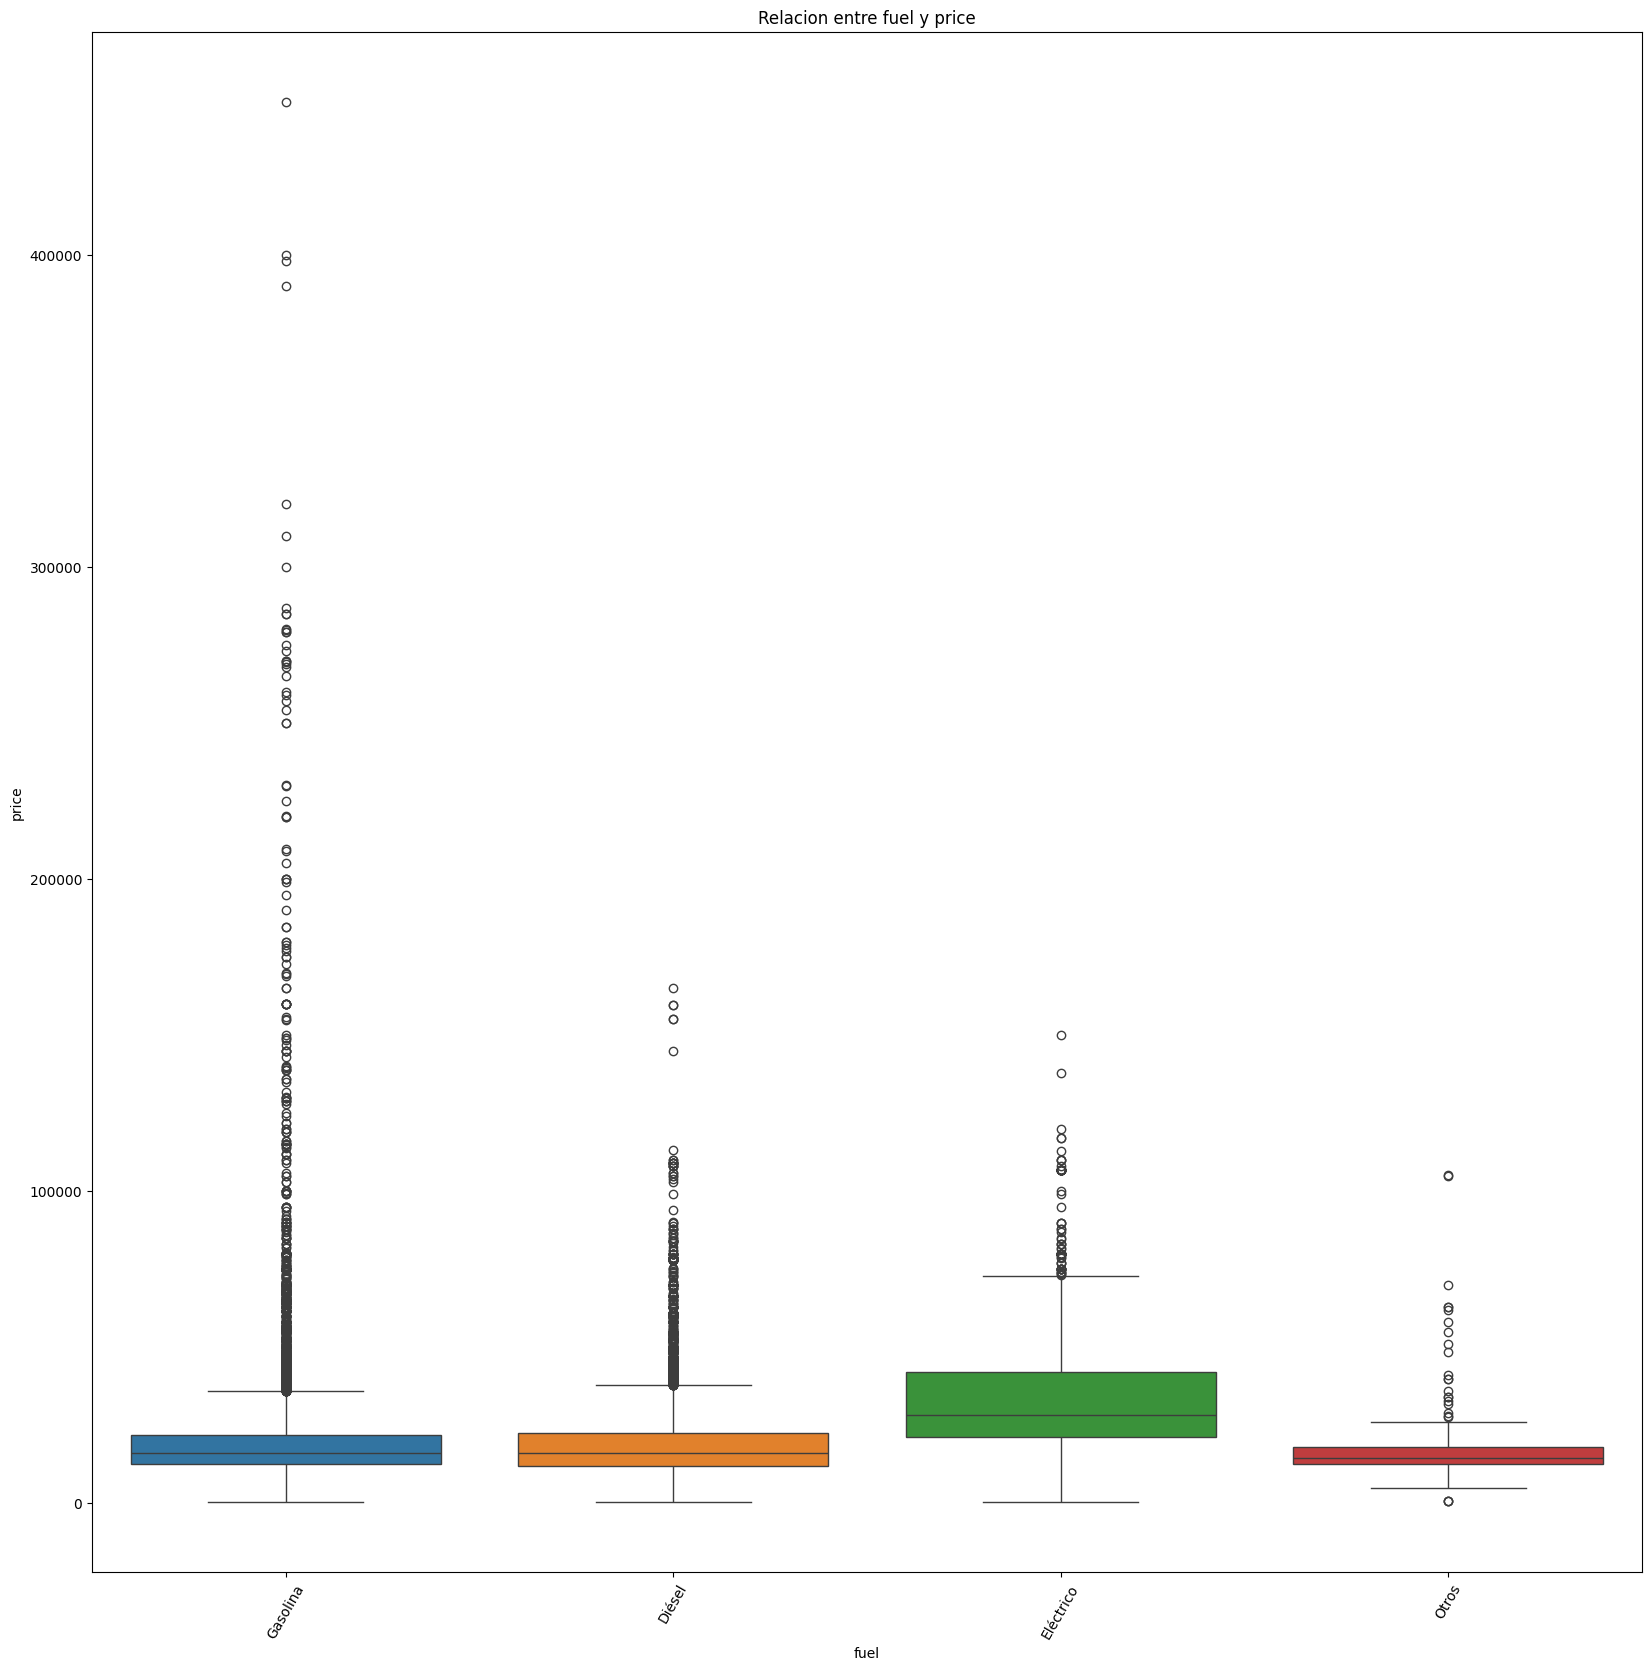

In [155]:
boxplot_categorica_numerica(df_eda,"fuel","price")

El análisis del boxplot muestra que los coches diésel no son los más baratos, ya que su mediana de precio (15.000 euros) supera a la de gasolina y "Otros", siendo los eléctricos los más caros (mediana 20.000-25.000 euros). Esto sugiere que factores como la demanda, el kilometraje o la percepción del mercado podrían estar influyendo, contradiciendo la hipótesis inicial.

### Vamos a ver que relación tienen los tipos de combustibles con los cambios de marchas: fuel/shift

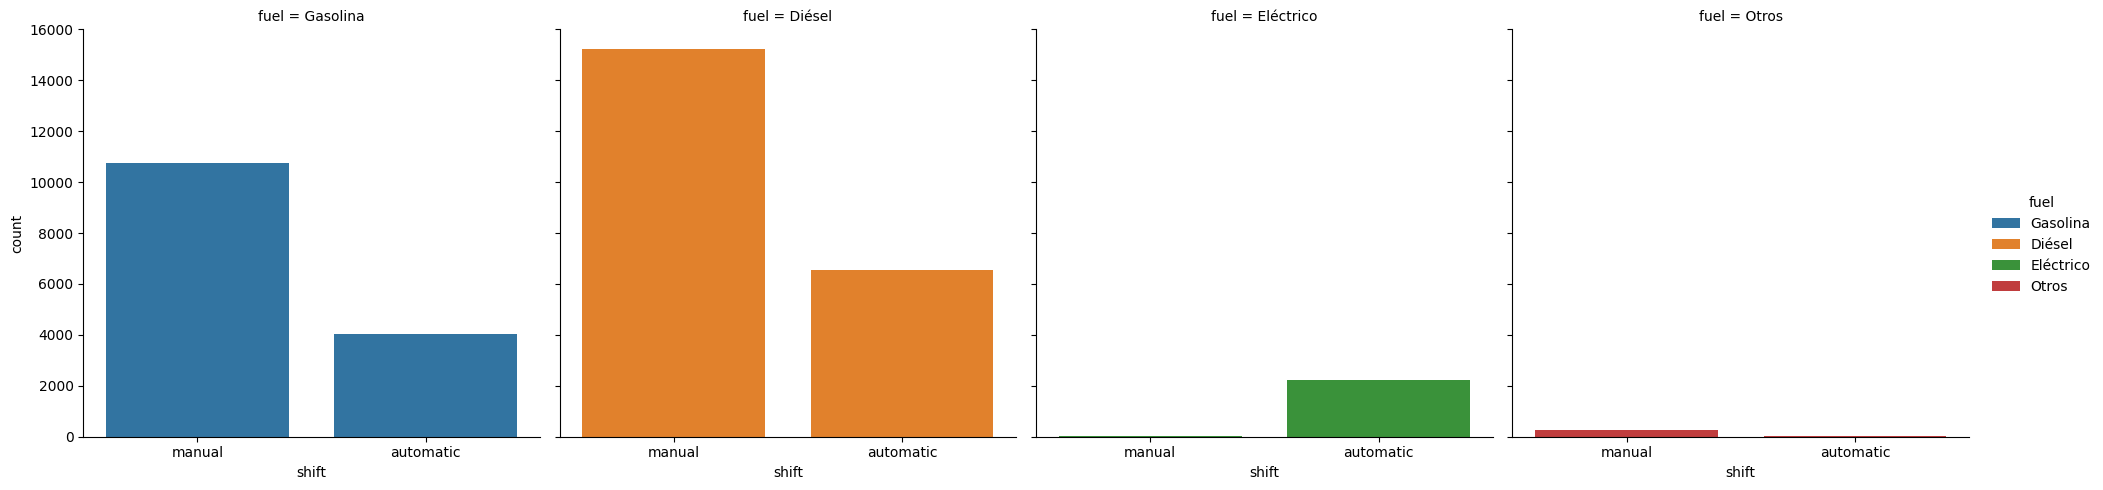

In [157]:
sns.catplot(x="shift",col="fuel",data=df_eda,kind="count",hue="fuel");

La categoría diésel tiene más del doble de manuales que de automáticos. Eso también nos da una razon para pensar que los coches diésel se pueden caracterizar como coches económicos. La categoría gasolina es similar a la diésel.

Sin embargo, la gran mayoría de los coches eléctricos son automáticos.Lo que nos lleva a la conclusión de que los coches eléctricos, la gran mayoría, son de gama media-alta sin mucha antiguedad.

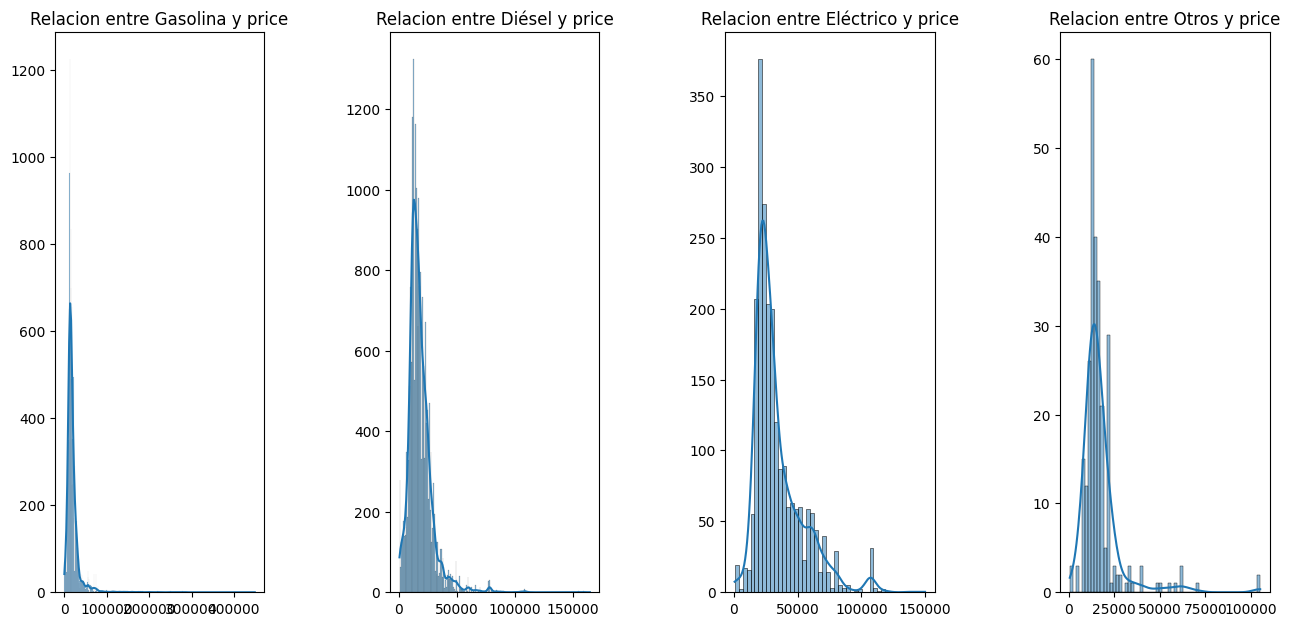

In [158]:
histogramas_categoric_numeric(df_eda,"fuel","price")

Los histogramas indican que los coches diésel no son los más baratos, ya que su distribución de precios (pico entre 10,000-20,000 euros) es más alta que la de gasolina (pico entre 5,000-15,000 euros), mientras que los eléctricos lideran en precios elevados (20,000-30,000 euros). Esto contradice la hipótesis, sugiriendo que los de gasolina podrían ser más económicos en el mercado de segunda mano.

<div style="color:blue">Pero hay un concepto que tenemos que mirar también que es el kilometraje por tipo de combustible, porque también esta el mito de que los coches diésel son más duraderos que los de gasolina. Vamos a ver si podemos sacar alguna conclusión extra con ello </div>

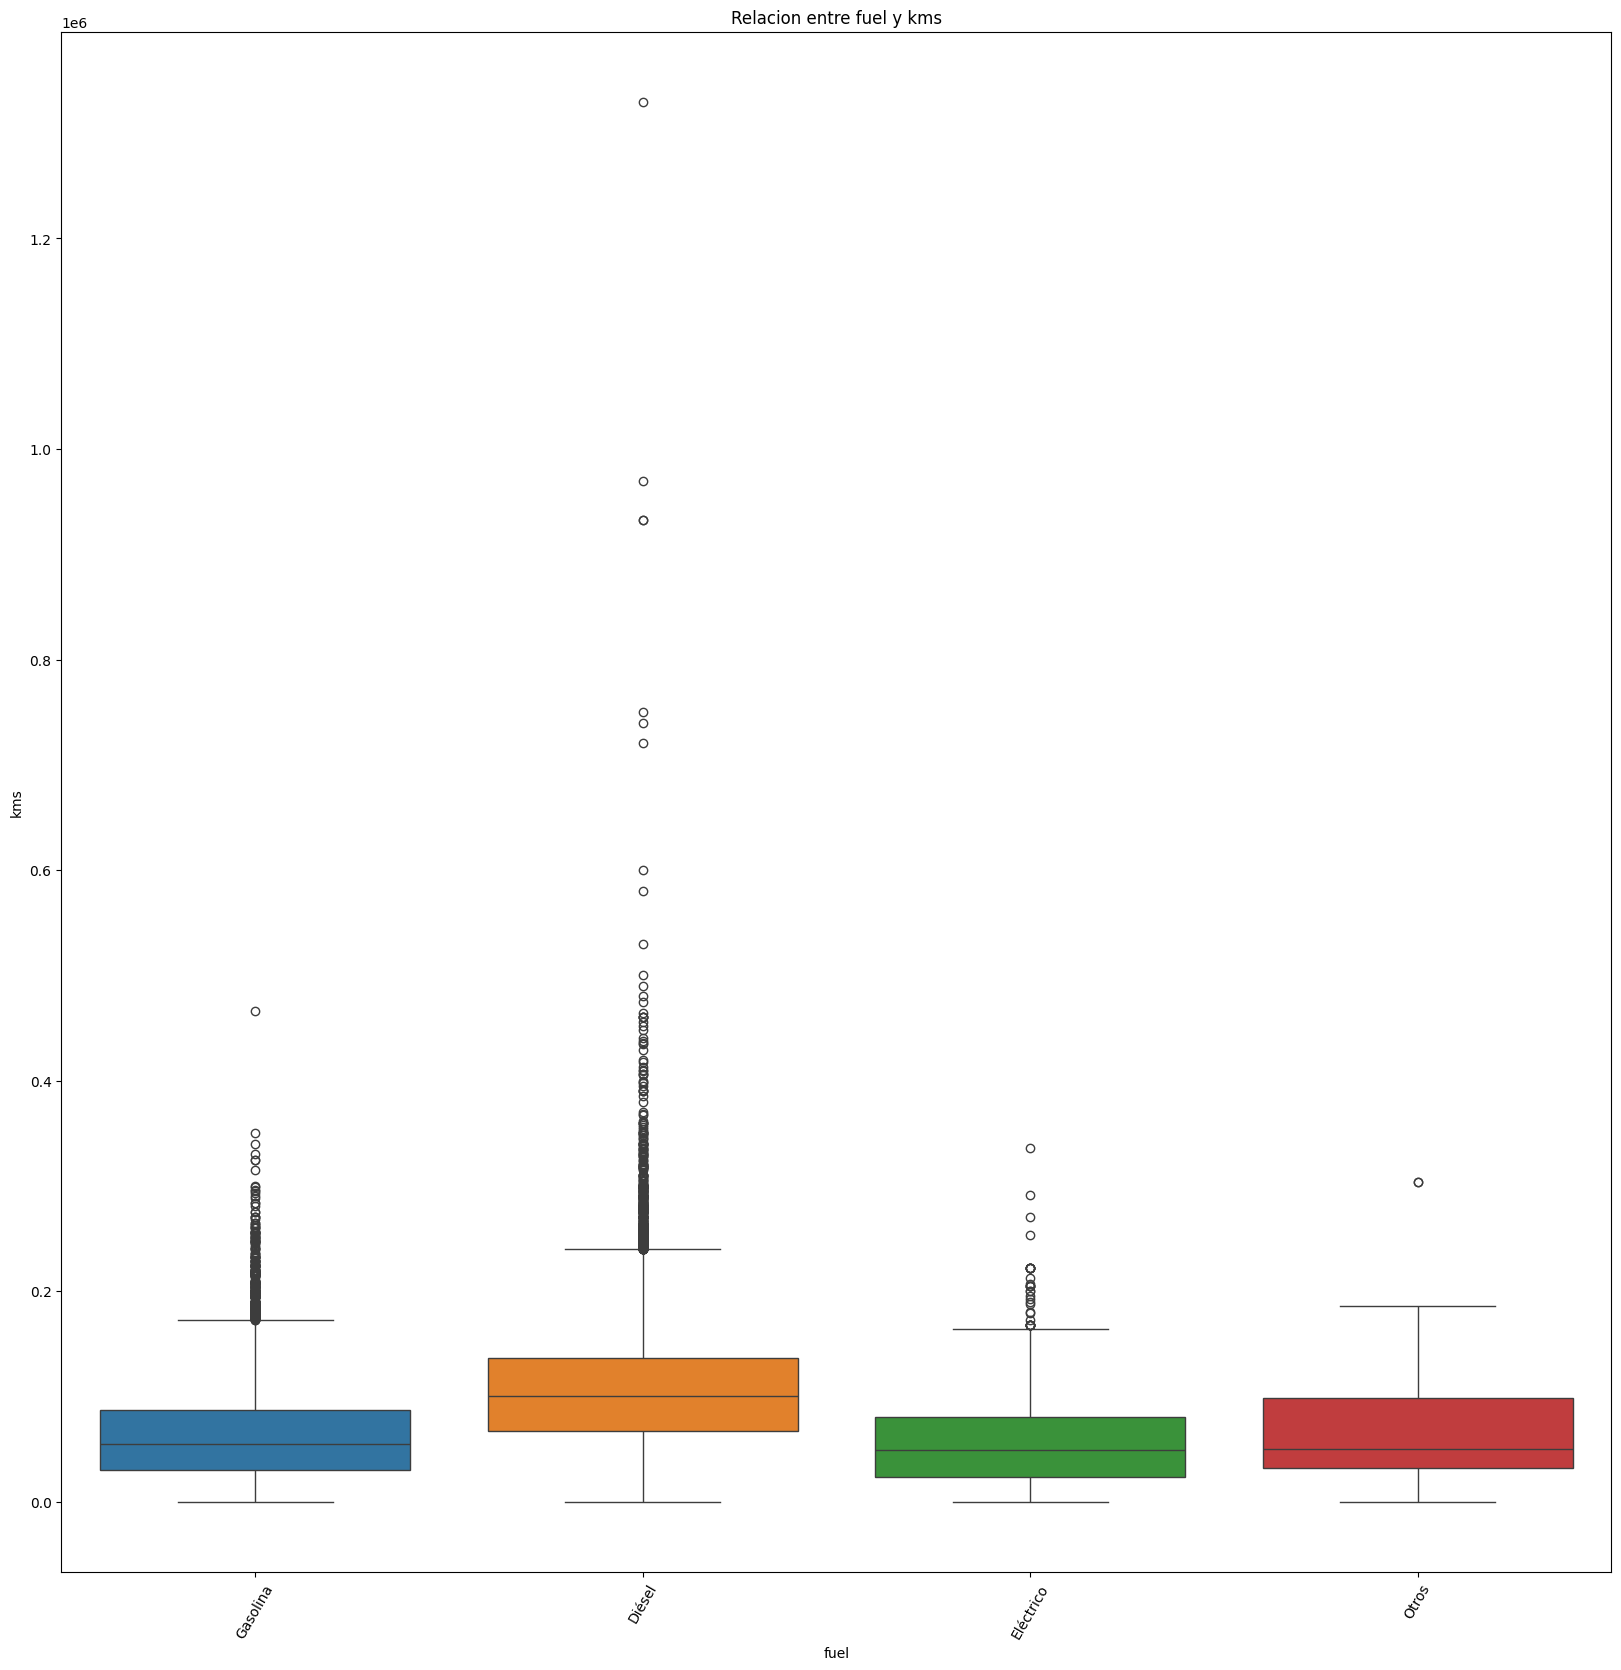

In [159]:
boxplot_categorica_numerica(df_eda,"fuel","kms")

Confirmamos exactamente lo que sospechábamos.

Los coches diésel tienen mayor kilometraje (mediana ≈150,000 km) que los de gasolina (≈50,000-100,000 km) y eléctricos (≈50,000 km), confirmando que duran más, como muestra el boxplot.

La mayor durabilidad de los diésel parece contribuir a que sean más caros que los de gasolina. A pesar de tener más kilómetros, los diésel mantienen precios competitivos (10,000-20,000 euros) frente a los de gasolina (5,000-15,000 euros), lo que sugiere que los compradores valoran su capacidad para seguir funcionando bien a largo plazo. Esto podría compensar el efecto del kilometraje elevado, que normalmente reduce el precio.

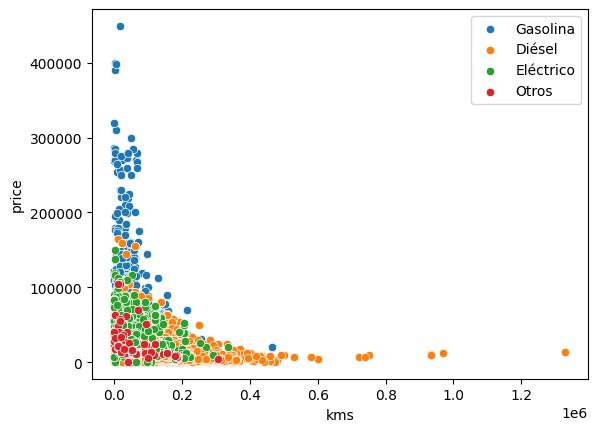

In [171]:
col_directora = "fuel"
col_1 = "price"
col_2 = "kms"
dicc = {}
for valor in df_eda[col_directora].unique():
    dicc[valor] = df_eda.loc[df_eda[col_directora] == valor,[col_2,col_1]]

for valor,df_subset in dicc.items():
    fig = sns.scatterplot(data=df_subset, x=col_2, y=col_1)
    fig.legend(labels=df_eda[col_directora].unique());
    

Este diagrama de dispersión apoya nuestro pensamiento de que los coches Diésel pueden ser un poco más caros que los de gasolina debido a su durabilidad y buen manejo a largo plazo con el kilometraje.

 ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vamos a hacer un contraste de hipótesis para verificar la relación de las variables **fuel** vs **price**

In [172]:
grupos = df_eda["fuel"].unique()
precios_x_combustible = [df_eda.loc[df_eda["fuel"] == grupo,"price"] for grupo in grupos]
valor_f_combustible,valor_p_combustible = stats.f_oneway(*precios_x_combustible)
valor_p_combustible

np.float64(0.0)

<div style="color:green">
Como hemos analizado, rechazamos la opción de que los coches Diésel son los más baratos siempre. Hemos visto que se alzan un poco por encima de los coches gasolina, pero debido a su durabilidad y fiabilidad.

Este análisis nos ha podido garantizar que, a parte de todo esto, el tipo de combustible de un coche afecta de forma importante al precio.

Por lo que habiendo hecho el contraste de hipótesis podemos rechazamos la Hipótesis nula de que no hay una correlación lineal entre fuel y price y aceptamos que hay evidencia estadísticamente significativa de que sí existe correlación lineal</div>

# Hipótesis 5: La ubicación del coche influye en su precio.

<div style="color:red">¿Por qué? La demanda y el costo de vida varían según la ubicación</div>

In [183]:
df_eda.groupby("state").agg({"price":"mean"}).sort_values(by="price")

,price
state,
La Rioja,15117.888889
Cantabria,16853.587912
Illes Balears,17477.826087
Euskadi,18767.728056
Región de Murcia,18832.291817
Asturias / Asturies,18930.569948
Galicia,19210.472603
Castilla y León,19261.534517
Extremadura,19268.929609


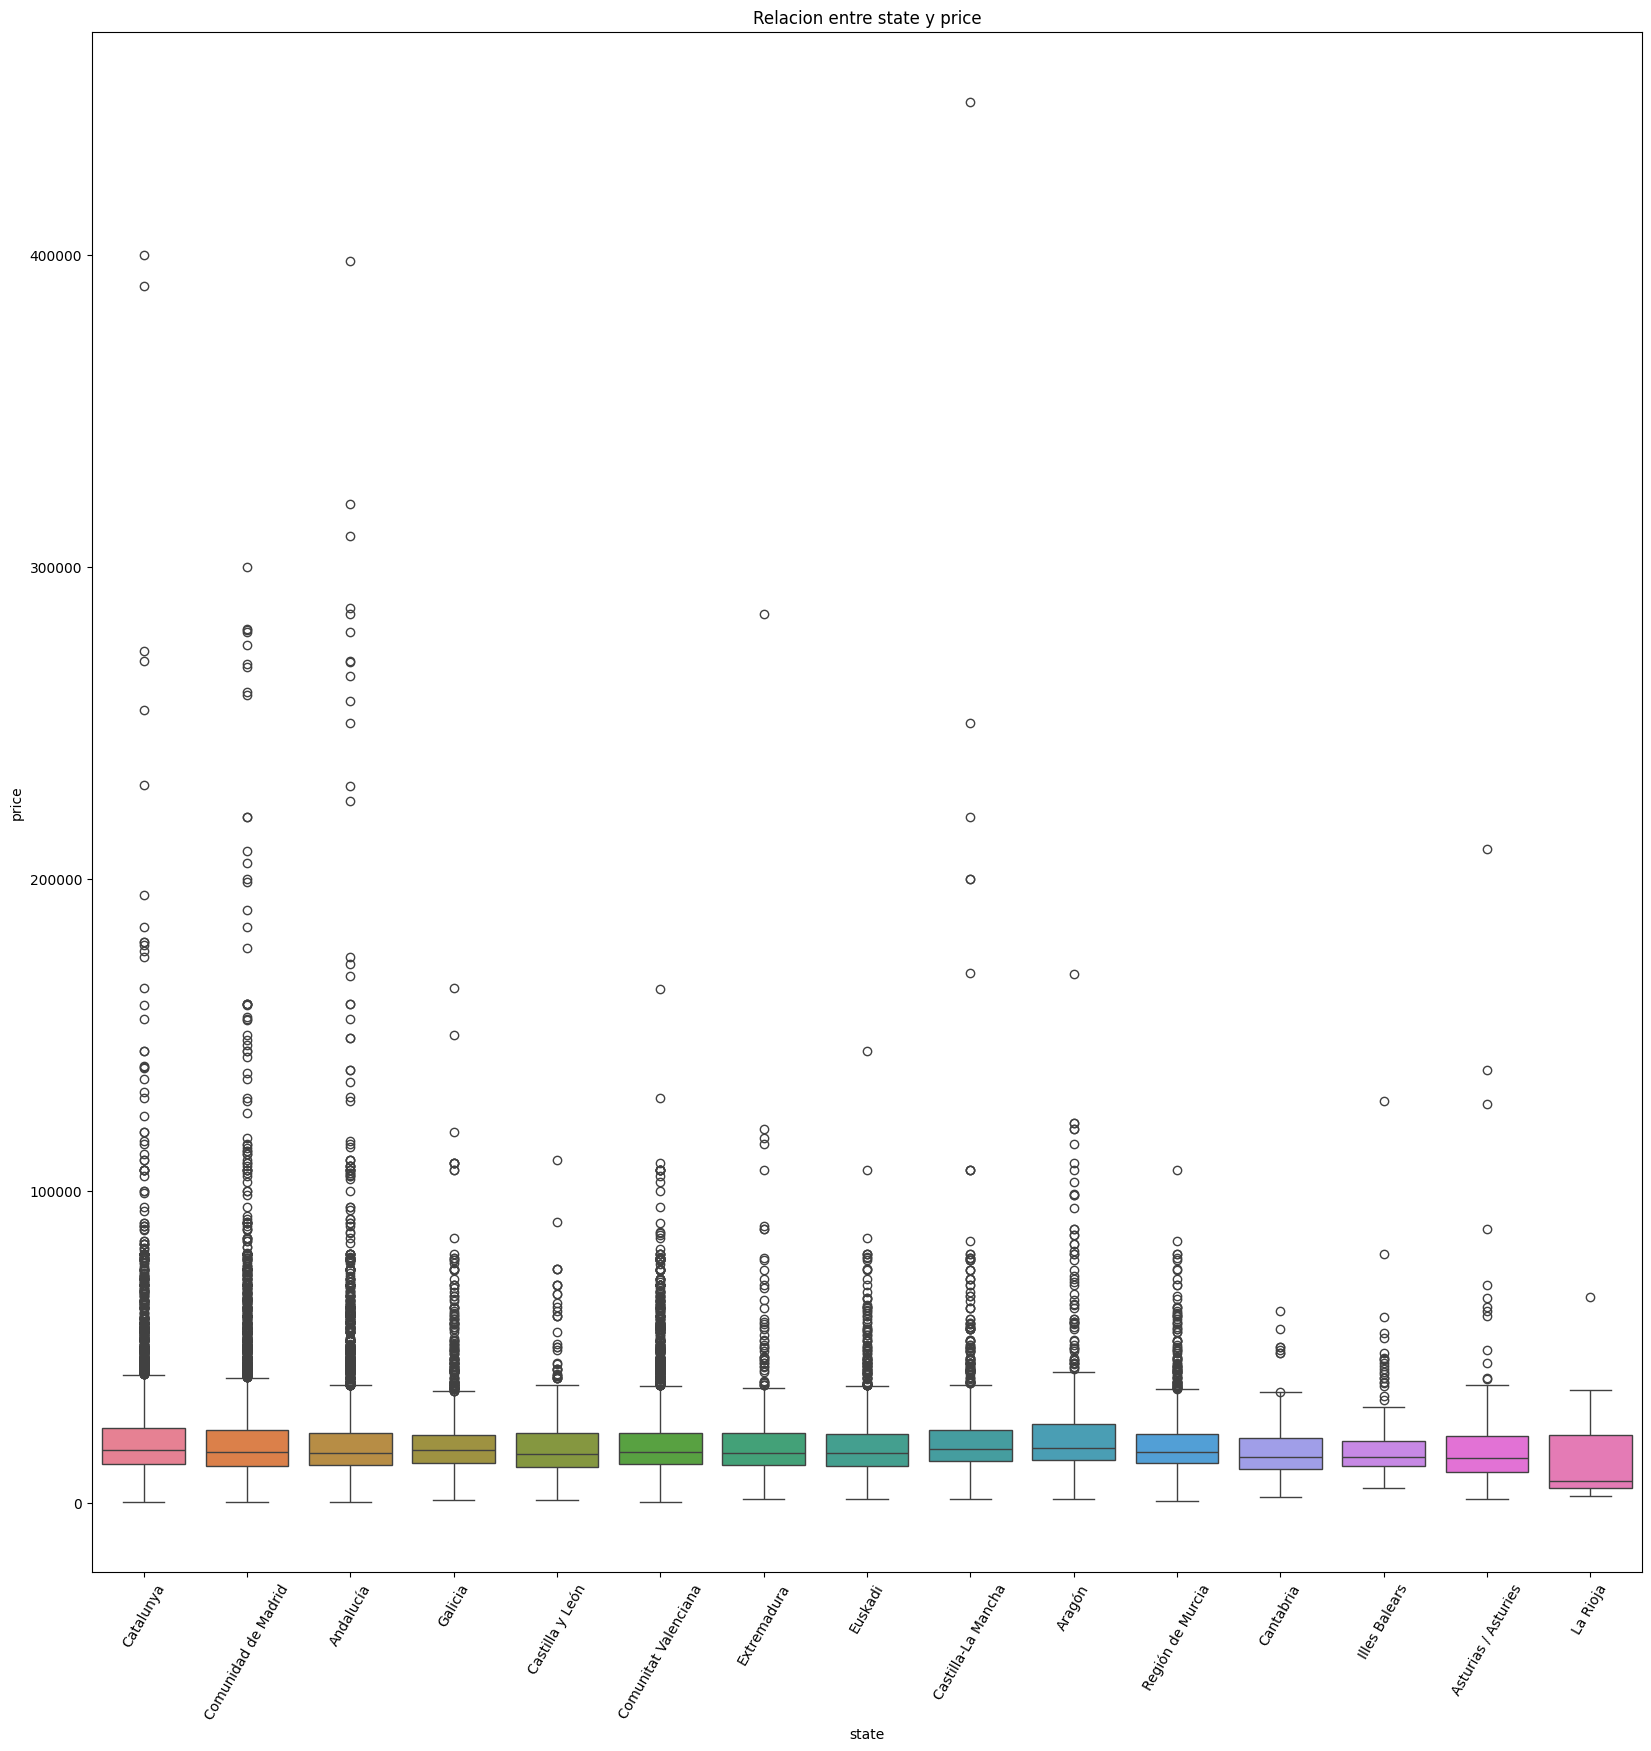

In [186]:
boxplot_categorica_numerica(df_eda,"state","price")

El boxplot confirma la hipótesis 5: la ubicación influye en el precio de los coches de segunda mano. Las grandes ciudades como Madrid (Comunidad de Madrid) y Barcelona (Cataluña) tienen medianas de precio más altas (15,000-20,000 euros) y mayor presencia de coches caros (outliers hasta 400.000 euros), probablemente debido a la mayor demanda, el costo de vida más elevado, y la presencia de modelos premium. Por otro lado, regiones menos urbanas como La Rioja tienen precios más bajos (medianas cerca de 10,000-12,000 euros), reflejando menor demanda y una oferta más orientada a coches económicos.

In [6]:
import plotly.express as px

df_coches_x_lat_long = df_eda.groupby(["lat","long","location"]).count()["make"].reset_index()
df_coches_x_lat_long.rename(columns={"make":"cantidad"},inplace=True)

fig = px.scatter_mapbox(df_coches_x_lat_long,lat="lat",lon="long",size="cantidad",mapbox_style="open-street-map",color="cantidad",color_continuous_scale="plasma",text="location",zoom=4.5);
fig.show();
fig.write_image("./img/mapa_españa.png")

C:\Users\David\AppData\Local\Temp\ipykernel_15084\3877182224.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



 ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vamos a hacer un contraste de hipótesis para verificar la relación de las variables **state** vs **price**

In [187]:
grupos = df_eda["state"].unique()
precios_x_combustible = [df_eda.loc[df_eda["state"] == grupo,"price"] for grupo in grupos]
valor_f_state,valor_p_state = stats.f_oneway(*precios_x_combustible)
valor_p_state

np.float64(7.161129722286167e-18)

<div style="color:green">Rechazamos la Hipótesis nula de que no hay una correlación lineal y aceptamos que hay evidencia estadísticamente significativa de que sí existe correlación lineal</div>